# Seasonal ARIMA forecasting on PV

## Import data

In [52]:
import warnings
warnings.filterwarnings("ignore")
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np

from sktime.forecasting.arima import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import DataRetriever as dr



retriever = dr.DataRetriever()
#year1 = retriever.get_data("All-Subsystems-hour-Year1.pkl")
year2 = retriever.get_data("All-Subsystems-hour-Year2.pkl")
year2

Timestamp  Load_LatentHeatWaterVolume  \
Timestamp                                                             
2015-02-01 00:00:00 2015-02-01 00:00:00                    0.060105   
2015-02-01 01:00:00 2015-02-01 01:00:00                    0.131439   
2015-02-01 02:00:00 2015-02-01 02:00:00                    0.194187   
2015-02-01 03:00:00 2015-02-01 03:00:00                    0.258256   
2015-02-01 04:00:00 2015-02-01 04:00:00                    0.322324   
...                                 ...                         ...   
2016-01-31 19:00:00 2016-01-31 19:00:00                    1.472255   
2016-01-31 20:00:00 2016-01-31 20:00:00                    1.546231   
2016-01-31 21:00:00 2016-01-31 21:00:00                    1.617565   
2016-01-31 22:00:00 2016-01-31 22:00:00                    1.688899   
2016-01-31 23:00:00 2016-01-31 23:00:00                    1.763535   

                     Load_RefrigeratorTemp  Load_StatusBA1Lights  \
Timestamp                                                          
2015-02-01 00:00:00               4.957915                   0.0   
2015-02-01 01:00:00               4.904702                   0.0   
2015-02-01 02:00:00               5.054887                   0.0   
2015-02-01 03:00:00               4.991525                   0.0   
2015-02-01 04:00:00               5.040868                   0.0   
...                                    ...                   ...   
2016-01-31 19:00:00               4.810046                   0.0   
2016-01-31 20:00:00               4.917617                   0.0   
2016-01-31 21:00:00               4.820712                   0.0   
2016-01-31 22:00:00               4.945030                   0.0   
2016-01-31 23:00:00               4.826671                   0.0   

                     Load_StatusKitchenLightsA  Load_StatusKitchenLightsB  \
Timestamp                                                                   
2015-02-01 00:00:00                   0.000000                   0.000000   
2015-02-01 01:00:00                   0.000000                   0.000000   
2015-02-01 02:00:00                   0.000000                   0.000000   
2015-02-01 03:00:00                   0.000000                   0.000000   
2015-02-01 04:00:00                   0.000000                   0.000000   
...                                        ...                        ...   
2016-01-31 19:00:00                   0.750000                   0.750000   
2016-01-31 20:00:00                   0.750000                   0.750000   
2016-01-31 21:00:00                   1.000000                   1.000000   
2016-01-31 22:00:00                   0.483333                   0.483333   
2016-01-31 23:00:00                   0.000000                   0.000000   

                     Load_StatusKitchenLightsC  Load_StatusDRLights  \
Timestamp                                                             
2015-02-01 00:00:00                   0.000000             0.000000   
2015-02-01 01:00:00                   0.000000             0.000000   
2015-02-01 02:00:00                   0.000000             0.000000   
2015-02-01 03:00:00                   0.000000             0.000000   
2015-02-01 04:00:00                   0.000000             0.000000   
...                                        ...                  ...   
2016-01-31 19:00:00                   0.750000             0.766667   
2016-01-31 20:00:00                   0.750000             0.483333   
2016-01-31 21:00:00                   1.000000             0.000000   
2016-01-31 22:00:00                   0.483333             0.000000   
2016-01-31 23:00:00                   0.000000             0.000000   

                     Load_StatusLRLights3  Load_StatusEntryHallLights  ...  \
Timestamp                                                              ...   
2015-02-01 00:00:00              0.000000                         0.0  ...   
2015-02-01 01:00:00              0.000000                    

In [53]:
# gen_year1 = year1[year1["PV_Watts3PhTotalW3PhT1"].isna() == False]
# gen_year1 = gen_year1[gen_year1["PV_Watts3PhTotalW3PhT2"].isna() == False] #There are 87 rows with NaN values.
#
# print(f"A total of {len(year1) - len(gen_year1)} rows have been dropped since they have NaN values.")
#
# gen_year1["Generated Energy"] = (gen_year1["PV_Watts3PhTotalW3PhT1"].to_numpy() + gen_year1["PV_Watts3PhTotalW3PhT2"].to_numpy())
# gen_year1 = gen_year1[["Generated Energy"]] / 1e3 #Convert Wh to kWh
# gen_year1

In [54]:
gen_year2 = year2[year2["PV_Watts3PhTotalW3PhT1"].isna() == False]
gen_year2 = gen_year2[gen_year2["PV_Watts3PhTotalW3PhT2"].isna() == False] #There are 87 rows with NaN values.

print(f"A total of {len(year2) - len(gen_year2)} rows have been dropped since they have NaN values.")

gen_year2["Generated Energy"] = (gen_year2["PV_Watts3PhTotalW3PhT1"].to_numpy() + gen_year2["PV_Watts3PhTotalW3PhT2"].to_numpy())
gen_year2 = gen_year2[["Generated Energy"]] / 1e3 #Convert Wh to kWh
gen_year2

A total of 87 rows have been dropped since they have NaN values.


Generated Energy
Timestamp                            
2015-02-01 00:00:00          0.018496
2015-02-01 01:00:00          0.018332
2015-02-01 02:00:00          0.018385
2015-02-01 03:00:00          0.018502
2015-02-01 04:00:00          0.018524
...                               ...
2016-01-31 19:00:00          0.017710
2016-01-31 20:00:00          0.017940
2016-01-31 21:00:00          0.018149
2016-01-31 22:00:00          0.018209
2016-01-31 23:00:00          0.018283

[8673 rows x 1 columns]

In [55]:
# gen_df = pd.concat([gen_year1, gen_year2])
# gen_df

In [56]:
gen_df = gen_year2

gen_df = gen_df.resample('h').sum()
gen_df

Generated Energy
Timestamp                            
2015-02-01 00:00:00          0.018496
2015-02-01 01:00:00          0.018332
2015-02-01 02:00:00          0.018385
2015-02-01 03:00:00          0.018502
2015-02-01 04:00:00          0.018524
...                               ...
2016-01-31 19:00:00          0.017710
2016-01-31 20:00:00          0.017940
2016-01-31 21:00:00          0.018149
2016-01-31 22:00:00          0.018209
2016-01-31 23:00:00          0.018283

[8760 rows x 1 columns]

In [57]:
fig = go.Figure(go.Scattergl(
    x = gen_df.index,
    y = gen_df["Generated Energy"]
))

fig.show()

## Check if PV is stationary

In [58]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(gen_df["Generated Energy"])

print(f"The p-value from the Augmented Dickey-Fuller test is {test[1]}. \n This suggest that the TS is stationary, and d=0.")

The p-value from the Augmented Dickey-Fuller test is 4.569102377280105e-19. 
 This suggest that the TS is stationary, and d=0.


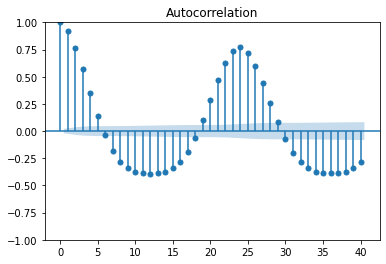

In [59]:
#However according to https://people.duke.edu/~rnau/arimrule.htm, we need to check the autocorrelations as well.

autocorrelation_no_difference = plot_acf(gen_df["Generated Energy"].dropna())

In [60]:
# Doing the differencing for fun

gen_df['1dif'] = gen_df["Generated Energy"] - gen_df["Generated Energy"].shift(1)
gen_df['2dif'] = gen_df["Generated Energy"] - gen_df["Generated Energy"].shift(2)
gen_df['3dif'] = gen_df["Generated Energy"] - gen_df["Generated Energy"].shift(3)

# gen_df

# Determine order of autoregressive terms (p)

p = 1


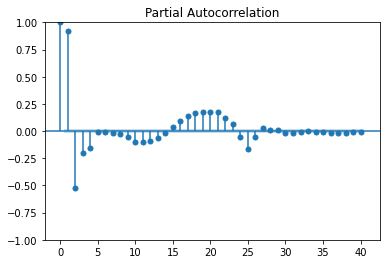

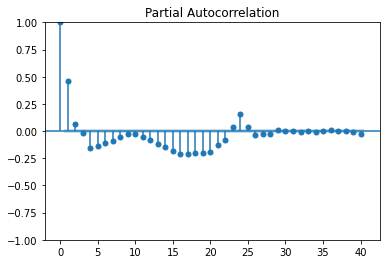

In [61]:
#This is done using the partial autocorrelation (PACF) plots

partialautocorrelation_no_difference = plot_pacf(gen_df['Generated Energy'].dropna())
partialautocorrelation_first_difference = plot_pacf(gen_df['1dif'].dropna())
#partialautocorrelation_second_difference = plot_pacf(gen_df['2dif'].dropna())
#partialautocorrelation_third_difference = plot_pacf(gen_df['3dif'].dropna())

print("p = 1")

### Determine order of moving average terms (q)

q = 5


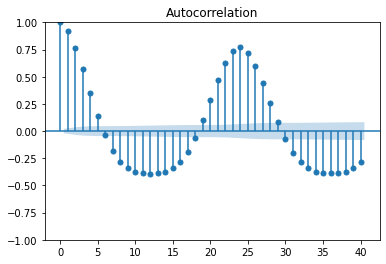

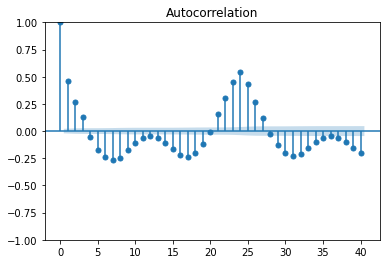

In [62]:
autocorrelation_no_difference = plot_acf(gen_df["Generated Energy"].dropna())
autocorrelation_first_difference = plot_acf(gen_df["1dif"].dropna())

print("q = 5")

## Calculate seasonal difference

In [63]:
# Seasonal difference is
gen_df["Seasonal Difference"] = gen_df["Generated Energy"] - gen_df["Generated Energy"].shift(24)
gen_df

Generated Energy      1dif      2dif      3dif  \
Timestamp                                                             
2015-02-01 00:00:00          0.018496       NaN       NaN       NaN   
2015-02-01 01:00:00          0.018332 -0.000165       NaN       NaN   
2015-02-01 02:00:00          0.018385  0.000053 -0.000112       NaN   
2015-02-01 03:00:00          0.018502  0.000117  0.000170  0.000005   
2015-02-01 04:00:00          0.018524  0.000022  0.000139  0.000192   
...                               ...       ...       ...       ...   
2016-01-31 19:00:00          0.017710  0.000288 -0.038315 -0.716600   
2016-01-31 20:00:00          0.017940  0.000230  0.000518 -0.038084   
2016-01-31 21:00:00          0.018149  0.000208  0.000439  0.000727   
2016-01-31 22:00:00          0.018209  0.000060  0.000269  0.000499   
2016-01-31 23:00:00          0.018283  0.000074  0.000134  0.000343   

                     Seasonal Difference  
Timestamp                                 
2015-02-01 00:00:00                  NaN  
2015-02-01 01:00:00                  NaN  
2015-02-01 02:00:00                  NaN  
2015-02-01 03:00:00                  NaN  
2015-02-01 04:00:00                  NaN  
...                                  ...  
2016-01-31 19:00:00             0.000077  
2016-01-31 20:00:00             0.000123  
2016-01-31 21:00:00             0.000199  
2016-01-31 22:00:00             0.000154  
2016-01-31 23:00:00             0.000120  

[8760 rows x 5 columns]

In [64]:
test = adfuller(gen_df["Seasonal Difference"].dropna())

print(f"The p value for the seasonal difference is {test[1]}.\nThis suggest D=0.")

The p value for the seasonal difference is 0.0.
This suggest D=0.


In [65]:
fig = go.Figure(go.Scatter(
    x = gen_df.index,
    y = gen_df["Seasonal Difference"]
))

fig.show()

### SAR and SMA terms

This indicates that P = 0,  and Q = 1 ?


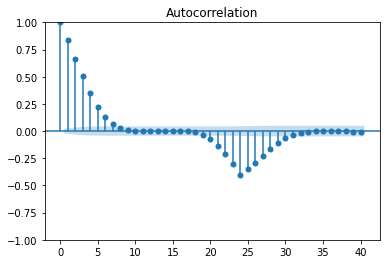

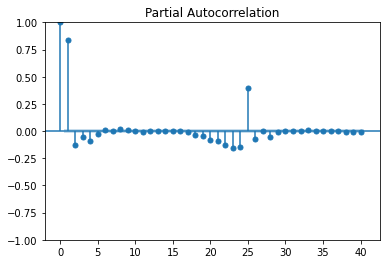

In [66]:
autocorrelation_seasonal_difference = plot_acf(gen_df["Seasonal Difference"].dropna())

partialautocorrelation_seasonal_difference = plot_pacf(gen_df['Seasonal Difference'].dropna())

print("This indicates that P = 0,  and Q = 1 ?")

## ARIMA model

In [67]:
exog_attributes = pd.DataFrame(year2['PV_PVInsolationHArray'].resample('h').sum())

X = pd.merge(gen_df, exog_attributes, how='left', on=gen_df.index)
X.drop(columns=['key_0'], inplace=True)
X.index = gen_df.index
X.drop(columns=['1dif', '2dif', '3dif', 'Seasonal Difference'], inplace=True)
X

Generated Energy  PV_PVInsolationHArray
Timestamp                                                   
2015-02-01 00:00:00          0.018496               0.057408
2015-02-01 01:00:00          0.018332               0.060286
2015-02-01 02:00:00          0.018385               0.058811
2015-02-01 03:00:00          0.018502               0.058865
2015-02-01 04:00:00          0.018524               0.059288
...                               ...                    ...
2016-01-31 19:00:00          0.017710               0.059872
2016-01-31 20:00:00          0.017940               0.059688
2016-01-31 21:00:00          0.018149               0.058976
2016-01-31 22:00:00          0.018209               0.059878
2016-01-31 23:00:00          0.018283               0.058991

[8760 rows x 2 columns]

In [68]:
prediction_range = 24 * 3 #Three days

In [69]:
test_df = X[len(X)-prediction_range:]
test_df

Generated Energy  PV_PVInsolationHArray
Timestamp                                                   
2016-01-29 00:00:00          0.018250               0.057477
2016-01-29 01:00:00          0.018189               0.056396
2016-01-29 02:00:00          0.018158               0.057628
2016-01-29 03:00:00          0.018049               0.056413
2016-01-29 04:00:00          0.018243               0.058013
...                               ...                    ...
2016-01-31 19:00:00          0.017710               0.059872
2016-01-31 20:00:00          0.017940               0.059688
2016-01-31 21:00:00          0.018149               0.058976
2016-01-31 22:00:00          0.018209               0.059878
2016-01-31 23:00:00          0.018283               0.058991

[72 rows x 2 columns]

In [70]:
X.drop(test_df.index, inplace=True)

validation_df = X[len(X) - prediction_range:]
validation_df

Generated Energy  PV_PVInsolationHArray
Timestamp                                                   
2016-01-26 00:00:00          0.000000               0.000000
2016-01-26 01:00:00          0.000000               0.000000
2016-01-26 02:00:00          0.000000               0.000000
2016-01-26 03:00:00          0.000000               0.000000
2016-01-26 04:00:00          0.000000               0.000000
...                               ...                    ...
2016-01-28 19:00:00          0.017729               0.057850
2016-01-28 20:00:00          0.017849               0.056320
2016-01-28 21:00:00          0.017882               0.057342
2016-01-28 22:00:00          0.018000               0.057909
2016-01-28 23:00:00          0.018138               0.056369

[72 rows x 2 columns]

In [71]:
train_df = X[:len(X)-prediction_range]
train_df

Generated Energy  PV_PVInsolationHArray
Timestamp                                                   
2015-02-01 00:00:00          0.018496               0.057408
2015-02-01 01:00:00          0.018332               0.060286
2015-02-01 02:00:00          0.018385               0.058811
2015-02-01 03:00:00          0.018502               0.058865
2015-02-01 04:00:00          0.018524               0.059288
...                               ...                    ...
2016-01-25 19:00:00          0.014773               0.058367
2016-01-25 20:00:00          0.000000               0.057008
2016-01-25 21:00:00          0.000000               0.000000
2016-01-25 22:00:00          0.000000               0.000000
2016-01-25 23:00:00          0.000000               0.000000

[8616 rows x 2 columns]

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_df['Generated Energy'], order=(1, 1, 3), seasonal_order=(0, 1, 1, 24))
result = model.fit()
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                     Generated Energy   No. Observations:                 8616
Model:             SARIMAX(1, 1, 3)x(0, 1, [1], 24)   Log Likelihood               -9431.881
Date:                              Wed, 27 Apr 2022   AIC                          18875.762
Time:                                      09:25:05   BIC                          18918.113
Sample:                                  02-01-2015   HQIC                         18890.207
                                       - 01-25-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3847      0.276     -1.392      0.164      -0.926       0.157
ma.L1          0.47

<AxesSubplot:ylabel='Density'>

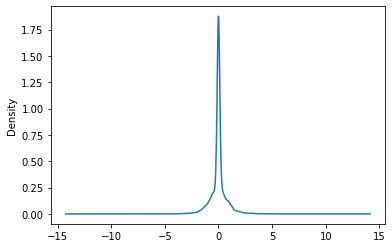

In [85]:
result.resid.plot(kind='kde')

In [86]:
test_df['PV_PVInsolationHArray'].values.reshape(72, 1)

array([[ 0.05747707],
       [ 0.05639614],
       [ 0.0576284 ],
       [ 0.05641299],
       [ 0.05801259],
       [ 0.0561993 ],
       [ 0.05750322],
       [ 0.83397477],
       [ 4.24555314],
       [ 4.56454167],
       [24.81880559],
       [28.50115733],
       [14.72902653],
       [39.815783  ],
       [20.59251873],
       [ 8.77837046],
       [ 3.02901524],
       [ 0.42309128],
       [ 0.05802233],
       [ 0.05676576],
       [ 0.0594998 ],
       [ 0.05816488],
       [ 0.05876801],
       [ 0.05643778],
       [ 0.05667811],
       [ 0.05755624],
       [ 0.05746866],
       [ 0.05887956],
       [ 0.05808865],
       [ 0.05914796],
       [ 0.06086427],
       [ 0.86546801],
       [10.49692217],
       [25.8340018 ],
       [34.88946504],
       [39.87156667],
       [31.13250167],
       [39.25161294],
       [32.32482614],
       [22.67995949],
       [ 9.61971816],
       [ 0.55506664],
       [ 0.0579943 ],
       [ 0.05940349],
       [ 0.05764238],
       [ 0

In [ ]:
import pmdarima as pm

seasonal_model = pm.auto_arima(train_df[['Generated Energy']],
                               #exogenous=train_df[['PV_PVInsolationHArray']],
                               start_p=1, start_q=1, d=1,
                               test='adf',
                               max_p=3, max_q=3, m=24,
                               start_P=0, start_Q=0, seasonal=True,
                               max_P=2, max_Q=2,
                               D=1, trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)

seasonal_model.summary()

### Forecasting

In [87]:
#gen_df['Prediction'] = result.predict(start = validation_df.index[0], end = validation_df.index[-1])
gen_df['Prediction'] = result.predict(start = 0, end = validation_df.index[-1])
gen_df

Generated Energy      1dif      2dif      3dif  \
Timestamp                                                             
2015-02-01 00:00:00          0.018496       NaN       NaN       NaN   
2015-02-01 01:00:00          0.018332 -0.000165       NaN       NaN   
2015-02-01 02:00:00          0.018385  0.000053 -0.000112       NaN   
2015-02-01 03:00:00          0.018502  0.000117  0.000170  0.000005   
2015-02-01 04:00:00          0.018524  0.000022  0.000139  0.000192   
...                               ...       ...       ...       ...   
2016-01-31 19:00:00          0.017710  0.000288 -0.038315 -0.716600   
2016-01-31 20:00:00          0.017940  0.000230  0.000518 -0.038084   
2016-01-31 21:00:00          0.018149  0.000208  0.000439  0.000727   
2016-01-31 22:00:00          0.018209  0.000060  0.000269  0.000499   
2016-01-31 23:00:00          0.018283  0.000074  0.000134  0.000343   

                     Seasonal Difference  Prediction  
Timestamp                                             
2015-02-01 00:00:00                  NaN    0.000000  
2015-02-01 01:00:00                  NaN    0.018496  
2015-02-01 02:00:00                  NaN    0.018332  
2015-02-01 03:00:00                  NaN    0.018385  
2015-02-01 04:00:00                  NaN    0.018502  
...                                  ...         ...  
2016-01-31 19:00:00             0.000077         NaN  
2016-01-31 20:00:00             0.000123         NaN  
2016-01-31 21:00:00             0.000199         NaN  
2016-01-31 22:00:00             0.000154         NaN  
2016-01-31 23:00:00             0.000120         NaN  

[8760 rows x 6 columns]

In [88]:
fig = go.Figure(go.Scattergl(
    x = gen_df.index,
    y = gen_df['Generated Energy'],
    name = "Observed Values"
))

fig.add_trace(go.Scattergl(
    x = gen_df.index,
    y = gen_df['Prediction'],
    name = "Predicted Values"
))

fig.show()

In [24]:
# If we need to predict future values

from pandas.tseries.offsets import DateOffset

new_dates = [gen_df.index[-1]+DateOffset(hours=x) for x in range(1, 26) ]
new_dates

[Timestamp('2016-02-01 00:00:00', freq='H'),
 Timestamp('2016-02-01 01:00:00', freq='H'),
 Timestamp('2016-02-01 02:00:00', freq='H'),
 Timestamp('2016-02-01 03:00:00', freq='H'),
 Timestamp('2016-02-01 04:00:00', freq='H'),
 Timestamp('2016-02-01 05:00:00', freq='H'),
 Timestamp('2016-02-01 06:00:00', freq='H'),
 Timestamp('2016-02-01 07:00:00', freq='H'),
 Timestamp('2016-02-01 08:00:00', freq='H'),
 Timestamp('2016-02-01 09:00:00', freq='H'),
 Timestamp('2016-02-01 10:00:00', freq='H'),
 Timestamp('2016-02-01 11:00:00', freq='H'),
 Timestamp('2016-02-01 12:00:00', freq='H'),
 Timestamp('2016-02-01 13:00:00', freq='H'),
 Timestamp('2016-02-01 14:00:00', freq='H'),
 Timestamp('2016-02-01 15:00:00', freq='H'),
 Timestamp('2016-02-01 16:00:00', freq='H'),
 Timestamp('2016-02-01 17:00:00', freq='H'),
 Timestamp('2016-02-01 18:00:00', freq='H'),
 Timestamp('2016-02-01 19:00:00', freq='H'),
 Timestamp('2016-02-01 20:00:00', freq='H'),
 Timestamp('2016-02-01 21:00:00', freq='H'),
 Timestamp

In [25]:
gen_df_predict = pd.DataFrame(index=new_dates, columns=gen_df.columns)
gen_df_predict

Generated Energy 1dif 2dif 3dif Seasonal Difference  \
2016-02-01 00:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 01:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 02:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 03:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 04:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 05:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 06:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 07:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 08:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 09:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 10:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 11:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 12:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 13:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 14:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 15:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 16:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 17:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 18:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 19:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 20:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 21:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 22:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-01 23:00:00              NaN  NaN  NaN  NaN                 NaN   
2016-02-02 00:00:00              NaN  NaN  NaN  NaN                 NaN   

                    Prediction  
2016-02-01 00:00:00        NaN  
2016-02-01 01:00:00        NaN  
2016-02-01 02:00:00        NaN  
2016-02-01 03:00:00        NaN  
2016-02-01 04:00:00        NaN  
2016-02-01 05:00:00        NaN  
2016-02-01 06:00:00        NaN  
2016-02-01 07:00:00        NaN  
2016-02-01 08:00:00        NaN  
2016-02-01 09:00:00        NaN  
2016-02-01 10:00:00        NaN  
2016-02-01 11:00:00        NaN  
2016-02-01 12:00:00        NaN  
2016-02-01 13:00:00        NaN  
2016-02-01 14:00:00        NaN  
2016-02-01 15:00:00        NaN  
2016-02-01 16:00:00        NaN  
2016-02-01 17:00:00        NaN  
2016-02-01 18:00:00        NaN  
2016-02-01 19:00:00        NaN  
2016-02-01 20:00:00        NaN  
2016-02-01 21:00:00        NaN  
2016-02-01 22:00:00        NaN  
2016-02-01 23:00:00        NaN  
2016-02-02 00:00:00        NaN

In [26]:
test_df = pd.concat([gen_df, gen_df_predict])
test_df

Generated Energy      1dif      2dif      3dif  \
2015-02-01 00:00:00         0.018496       NaN       NaN       NaN   
2015-02-01 01:00:00         0.018332 -0.000165       NaN       NaN   
2015-02-01 02:00:00         0.018385  0.000053 -0.000112       NaN   
2015-02-01 03:00:00         0.018502  0.000117   0.00017  0.000005   
2015-02-01 04:00:00         0.018524  0.000022  0.000139  0.000192   
...                              ...       ...       ...       ...   
2016-02-01 20:00:00              NaN       NaN       NaN       NaN   
2016-02-01 21:00:00              NaN       NaN       NaN       NaN   
2016-02-01 22:00:00              NaN       NaN       NaN       NaN   
2016-02-01 23:00:00              NaN       NaN       NaN       NaN   
2016-02-02 00:00:00              NaN       NaN       NaN       NaN   

                    Seasonal Difference Prediction  
2015-02-01 00:00:00                 NaN        NaN  
2015-02-01 01:00:00                 NaN        NaN  
2015-02-01 02:00:00                 NaN        NaN  
2015-02-01 03:00:00                 NaN        NaN  
2015-02-01 04:00:00                 NaN        NaN  
...                                 ...        ...  
2016-02-01 20:00:00                 NaN        NaN  
2016-02-01 21:00:00                 NaN        NaN  
2016-02-01 22:00:00                 NaN        NaN  
2016-02-01 23:00:00                 NaN        NaN  
2016-02-02 00:00:00                 NaN        NaN  

[8785 rows x 6 columns]

In [27]:
test_df['Prediction'] = result.predict(start=8759, end=8785)
test_df

Generated Energy      1dif      2dif      3dif  \
2015-02-01 00:00:00         0.018496       NaN       NaN       NaN   
2015-02-01 01:00:00         0.018332 -0.000165       NaN       NaN   
2015-02-01 02:00:00         0.018385  0.000053 -0.000112       NaN   
2015-02-01 03:00:00         0.018502  0.000117   0.00017  0.000005   
2015-02-01 04:00:00         0.018524  0.000022  0.000139  0.000192   
...                              ...       ...       ...       ...   
2016-02-01 20:00:00              NaN       NaN       NaN       NaN   
2016-02-01 21:00:00              NaN       NaN       NaN       NaN   
2016-02-01 22:00:00              NaN       NaN       NaN       NaN   
2016-02-01 23:00:00              NaN       NaN       NaN       NaN   
2016-02-02 00:00:00              NaN       NaN       NaN       NaN   

                    Seasonal Difference  Prediction  
2015-02-01 00:00:00                 NaN         NaN  
2015-02-01 01:00:00                 NaN         NaN  
2015-02-01 02:00:00                 NaN         NaN  
2015-02-01 03:00:00                 NaN         NaN  
2015-02-01 04:00:00                 NaN         NaN  
...                                 ...         ...  
2016-02-01 20:00:00                 NaN    0.016763  
2016-02-01 21:00:00                 NaN    0.016773  
2016-02-01 22:00:00                 NaN    0.016853  
2016-02-01 23:00:00                 NaN    0.016925  
2016-02-02 00:00:00                 NaN    0.017049  

[8785 rows x 6 columns]

In [28]:
fig = go.Figure(go.Scattergl(
    x = test_df.index,
    y = test_df['Generated Energy']
))

fig.add_trace(go.Scattergl(
    x = test_df.index,
    y = test_df['Prediction'])
)

fig.show()

#test_df[['Generated Energy', 'Prediction']].plot()